# DSC 530 - Final Project - Rachel Wantuch

**Statistical Question** : WWhat makes a great hockey player/How do the good ones play as long as they do? Is it because they have more goals? More assists? More penalty minutes? Played in more games? Or is it that unquantifiable player making ability?
<br>
Variables Used:
* PIM: Penalty Minutes for that year
* G: Goals scored that year
* A: Assists attributed to the player
* SOG: Shots on goal that year
* GP: Games played for that year
* Origin: Nationality
* Origin_bool: Assigning 1s to Canadians and 0s to other nationalities.

# Importing Data and Python Packages

In [1]:
import numpy as np
import opendatasets as od
import pandas as pd
import random

In [2]:
#File contains stats for every player for every season that they played.
file=('/Users/rwant/OneDrive/Desktop/Bellevue/DSC 530/Final Project/Scoring.csv')
dfScoring=pd.read_csv(file)

#Contains bio info
file1=('/Users/rwant/OneDrive/Desktop/Bellevue/DSC 530/Final Project/Master.csv')
dfMaster=pd.read_csv(file1)

# Data Transformations

In [6]:
dfScoring=dfScoring[dfScoring.lgID=='NHL']
#only keeping records for 1967 and later. THis is the post original-six era.
dfScoring=dfScoring[dfScoring.year >= 1967]

Below creates a new dataframe that sums the given columns by playerID. This creates basically a dataframe to look at each plaers career.

In [9]:
dfCareer=dfScoring.groupby('playerID')[['GP', 'G', 'A', 'Pts', 'SOG', 'PIM']].sum().reset_index()
origin= dfMaster['birthCountry']
dfCareer['Origin']= origin
print(dfCareer)

       playerID      GP      G      A    Pts     SOG    PIM          Origin
0     aaltoan01   151.0   11.0   17.0   28.0   182.0   52.0         Finland
1     abdelju01   209.0   18.0   29.0   47.0   337.0  160.0          Canada
2     abgrade01    13.0    0.0    2.0    2.0     9.0    4.0          Canada
3      abidra01    68.0   14.0   16.0   30.0   112.0   78.0          Canada
4     abrahth01    32.0    6.0   11.0   17.0    66.0   16.0             USA
...         ...     ...    ...    ...    ...     ...    ...             ...
5544  zubruda01  1065.0  206.0  333.0  539.0  1738.0  671.0        Slovakia
5545  zuccama01    52.0    8.0   18.0   26.0    84.0   10.0        Slovakia
5546  zuckeja01     6.0    0.0    2.0    2.0    10.0    2.0  Czech Republic
5547   zukemi01   455.0   86.0  196.0  282.0   754.0  220.0             USA
5548  zyuzian01   496.0   38.0   82.0  120.0   683.0  446.0          Sweden

[5549 rows x 8 columns]


In [11]:
unique=dfCareer['Origin'].unique()
print(unique)

['Finland' 'Canada' 'USA' 'Sweden' nan 'Brunei Darussalam' 'Switzerland'
 'Russia' 'Ireland' 'Scotland' 'Belarus' 'Latvia' 'Czech Republic'
 'Ukraine' 'Slovakia' 'England' 'Belgium' 'Croatia' 'Denmark' 'Yugoslavia'
 'USSR' 'France' 'Austria' 'Germany' 'Venezuela' 'Wales' 'Poland' 'Italy'
 'Australia' 'South Wales' 'Japan' 'Brazil' 'Northern Ireland' 'Lebanon'
 'British West Indies' 'Norway' 'Lithuania' 'Netherlands' 'Kazakhstan'
 'South Africa' 'Slovenia' 'Taiwan' 'Jamaica' 'Nigeria' 'Tanzania' 'Korea'
 'South Korea']


Below I decided to add another column that assigned a 1 if the Origin column was Canada and a 0 otherwise. I did this for future use similar to the textbook so I can select Canadian players and all other players without having to remember the list of other origins.

In [14]:
#Creating a new row of boolean values Canadian=1. Other nationality=0.
dfCareer['Origin_bool']=dfCareer['Origin'].apply(lambda x:1 if x == 'Canada' else 0)

In [16]:
Canadian=dfCareer[dfCareer.Origin_bool == 1]
Other=dfCareer[dfCareer.Origin_bool == 0]

# Variables

In [19]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [21]:
import thinkplot
import thinkstats2
import matplotlib.pyplot as plt

### Games Played (GP) by player fover the course of their career

I'm going to switch to using matplotlib because as best I could tell there is now way to bin numbers using thinkstats2 or thinkplot. I tried doing the basic histograms without bins and it was almost undreadable.

Text(0.5, 1.0, 'Histogram of Total Games Played by Every Player in the NHL')

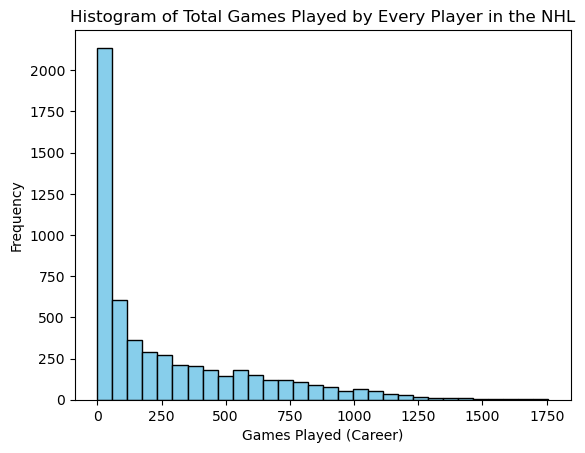

In [25]:
plt.hist(dfCareer.GP, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Games Played (Career)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Games Played by Every Player in the NHL')

In [27]:
mean=dfCareer.GP.mean()
var=dfCareer.GP.var()
std=dfCareer.GP.std()
print(mean)
print(var)
print(std)

269.0646963416832
103428.76419863061
321.6034269074734


This makes sense as not everyone that ever plays in the NHL plays every game every season. One thing to note is that since this dataset covers back to 1909 when there were only 12 games in the season. Teams don't start playing minimum 80 games a season until 1974. This looks like a parabola. Without further investigation yet it appears that players either have a short season or a long season. The two end values of 83 and 84 are because of the 1992 and 1993 season where the NHL experimented with adding a couple of games.

### Goals (G)

Text(0.5, 1.0, 'Histogram of Career Goals by Every Player in the NHL')

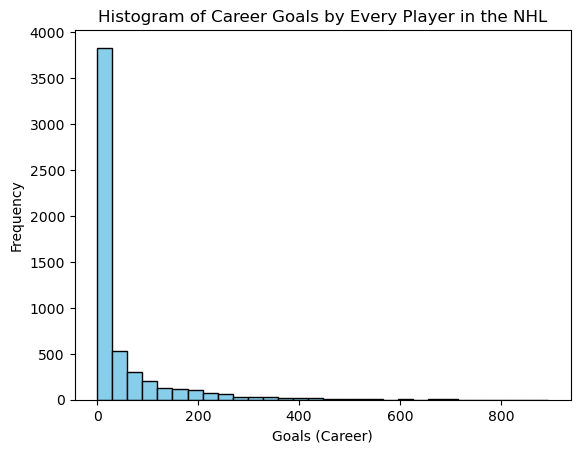

In [31]:
plt.hist(dfCareer.G, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Goals (Career)')
plt.ylabel('Frequency')
plt.title('Histogram of Career Goals by Every Player in the NHL')

In [38]:
mean=dfCareer.G.mean()
var=dfCareer.G.var()
std=dfCareer.G.std()
print(mean)
print(var)
print(std)

45.44782843755632
7969.089788452227
89.26975853250768


In [33]:
max_goals=dfScoring['PIM'].max()
print(max_goals)

472.0


What appears to be an outlier is exactly why Wayne Gretzky is known as The Great One. He had a very good season in 1981.

### Assist (A)

Text(0.5, 1.0, 'Histogram of Career Assists by Every Player in the NHL')

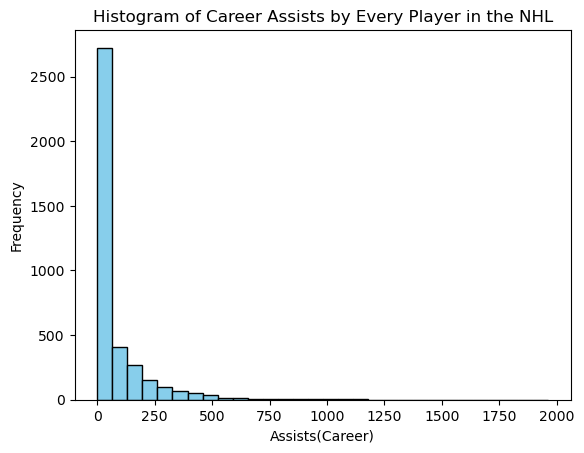

In [44]:
plt.hist(Canadian.A, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Assists(Career)')
plt.ylabel('Frequency')
plt.title('Histogram of Career Assists by Every Player in the NHL')

In [46]:
mean=dfCareer.A.mean()
var=dfCareer.A.var()
std=dfCareer.A.std()
print(mean)
print(var)
print(std)

76.0621733645702
18840.930344302367
137.26226846552686


### Shots on Goal (SOG)

Text(0.5, 1.0, 'Histogram of Career Shots on Goal by Every Player in the NHL')

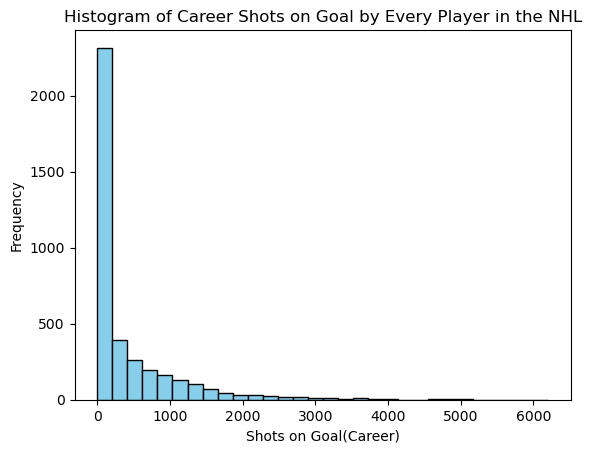

In [49]:
plt.hist(Canadian.SOG, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Shots on Goal(Career)')
plt.ylabel('Frequency')
plt.title('Histogram of Career Shots on Goal by Every Player in the NHL')

In [51]:
mean=dfCareer.SOG.mean()
var=dfCareer.SOG.var()
std=dfCareer.SOG.std()
print(mean)
print(var)
print(std)

428.6606595783024
491869.03821592877
701.3337566493778


### Penalty Minutes (PIM)

Text(0.5, 1.0, 'Histogram of Penalty Minutes by Every Player in the NHL')

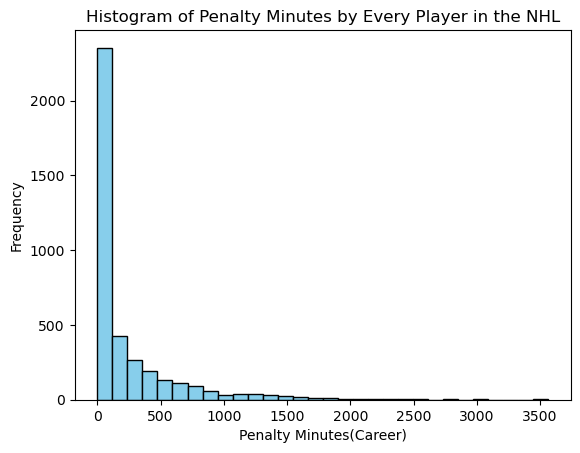

In [54]:
plt.hist(Canadian.PIM, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Penalty Minutes(Career)')
plt.ylabel('Frequency')
plt.title('Histogram of Penalty Minutes by Every Player in the NHL')

In [56]:
mean=dfCareer.PIM.mean()
var=dfCareer.PIM.var()
std=dfCareer.PIM.std()
print(mean)
print(var)
print(std)

239.44782843755632
169501.4935375486
411.705590850487


The graph has roughly the same distribution as the others but here there is a solid blue chunk and then more spaced out lines above that. That tells me there is a group of players that doesn't get in trouble a lot but those that do get penalties basically make that their identity.

# PMF - Canadian Goals vs Other Nationalities Goals

This PMF examines career goals by Canadians vs players of any other nationality.

In [37]:
canadian_pmf=thinkstats2.Pmf(Canadian.G, label="Canadian")
other_pmf=thinkstats2.Pmf(Other.G, label="Others")

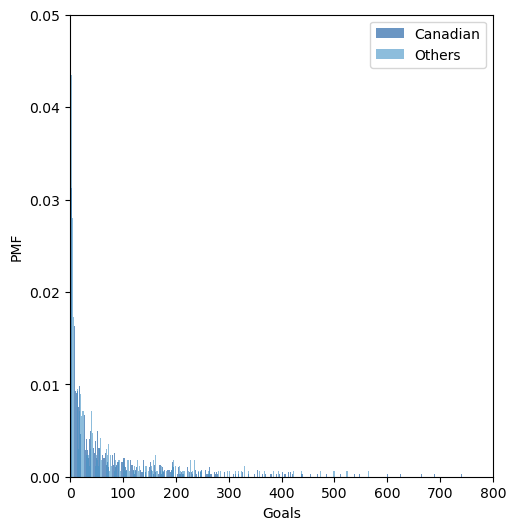

In [39]:
width=0.75
thinkplot.PrePlot(2,cols=2)
thinkplot.Hist(canadian_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Goals',
                 ylabel='PMF',
                axis=[0,800, 0,0.05])

#### Difference in Probability between Canadian Goal Scorers Other Nationalities

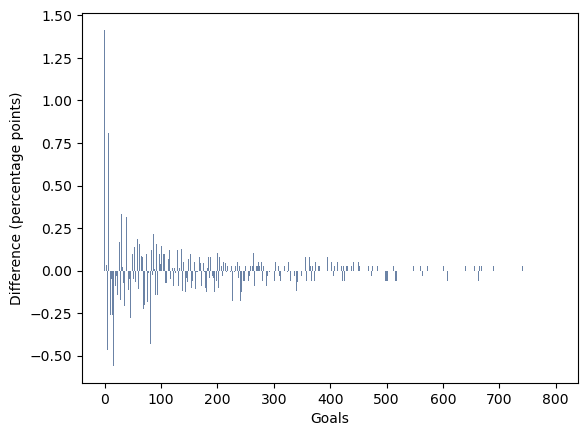

In [203]:
goals = range(0, 800)
diffs = []
for goal in goals:
    p1 = canadian_pmf.Prob(goal)
    p2 = other_pmf.Prob(goal)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(goals, diffs)
thinkplot.Config(xlabel='Goals', ylabel='Difference (percentage points)')

I wish Jupyter Notebook had a zoom in function on graphs. This graph does help make the data a bit more readable though at least compared to the PMF. The Canadian numbers are on the top of the line and others are below the line. We can see that Canadians have a higher probability percentage at the initial value of zero. Around roughly 10-20 goals other nationalities seem to have the higher probability percentage. It's the only noticeable gap because after that each group takes turns fairly evenly being the higher probability percentage.

# CDF

Here I chose to examine what the goal distribution looked like. I wanted to see what the percentage of players scoring different amounts of goals looked like.

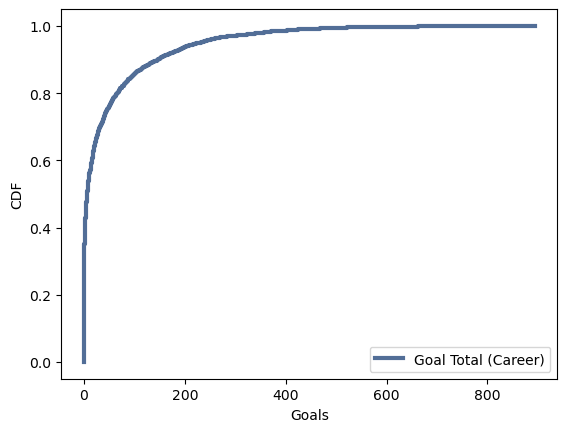

<Figure size 800x600 with 0 Axes>

In [67]:
cdf=thinkstats2.Cdf(dfCareer.G, label="Goal Total (Career)")
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Goals', ylabel='CDF')

# Pareto Distribution

### General Pareto CDF

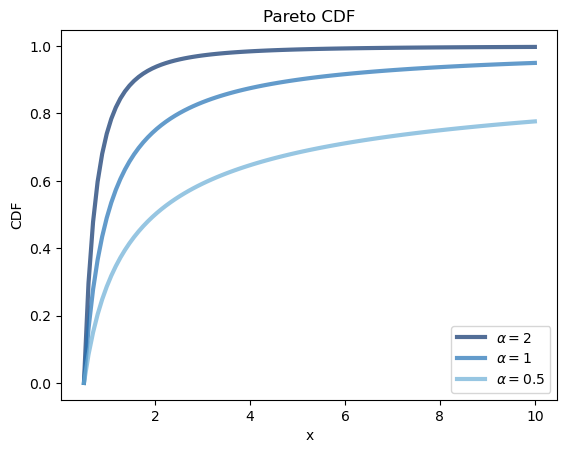

In [41]:
#This first box of code is a general Pareto CDF for the given values.
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100)
    thinkplot.Plot(xs, ps, label=r"$\alpha=%g$" % alpha)
#xmin= minium possible value
#alpha=shape parameter. Higher alpha= a distribution with fewer large values. Small alpha= a distribution with a lot of large value.
#0=low
#10=high
#n=number of points to render

thinkplot.Config(title="Pareto CDF", xlabel="x", ylabel="CDF", loc="lower right")

### Applying it to my data - Pareto of Assists

C:\Users\rwant\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


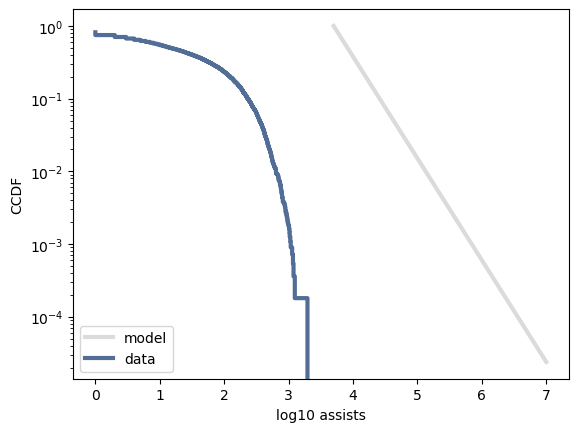

In [44]:
assists= dfCareer.A
log_assists = np.log10(assists)
cdf = thinkstats2.Cdf(assists, label="data")
cdf_log = thinkstats2.Cdf(log_assists, label="data")

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1 - ys, label="model", color="0.8")

thinkplot.Cdf(cdf_log, complement=True)
thinkplot.Config(
    xlabel="log10 assists", ylabel="CCDF", yscale="log", loc="lower left"
)

A pareto distribution was completely not a good fit! Following the suggestion of the chapter 5 file for this book I will try a lognormal distribution next.

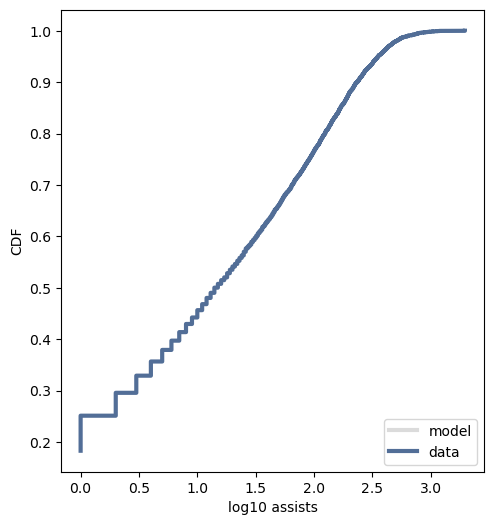

In [47]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_assists.mean(), log_assists.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=20)
thinkplot.Plot(xs, ps, label="model", color="0.8")

thinkplot.Cdf(cdf_log)
thinkplot.Config(xlabel="log10 assists", ylabel="CDF", loc="lower right")

It's either a perfect fit or the model line is completely off the graph. It seems to be a perfect fit though so a lognormal distribution is the best choice for this data.

# Scatterplots x2

I probably won't need to use the jitter function called out in the book because none of my variables are rounded up or down.

In [82]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

### Scatterplot Goals vs Games Played

In [84]:
sample = SampleRows(dfCareer, 2000)
goals, games_played = sample.G, sample.GP

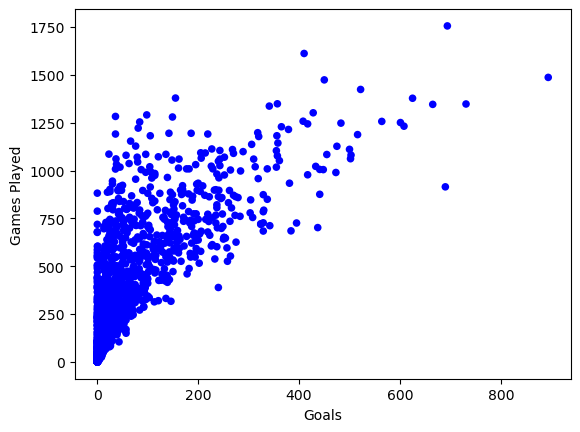

In [86]:
thinkplot.Scatter(goals, games_played, alpha=1)
thinkplot.Config(xlabel='Goals',
                 ylabel='Games Played',
                 legend=False)

#### Covariance

In [138]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [140]:
goals, gp = dfCareer.G, dfCareer.GP
Cov(goals, gp)

22364.511304665873

The result indicates a very strong, positive relationship between goals and games played.

#### Pearson's Correlation

In [142]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [144]:
Corr(goals, gp)

0.7791348981790683

This also supports a strong, positive relationship.

#### Spearman's Correlation

In [148]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [150]:
SpearmanCorr(goals, gp)

0.852030203650717

## Scatterplot Games Played vs PIM

In [160]:
gp, pim= sample.GP, sample.PIM

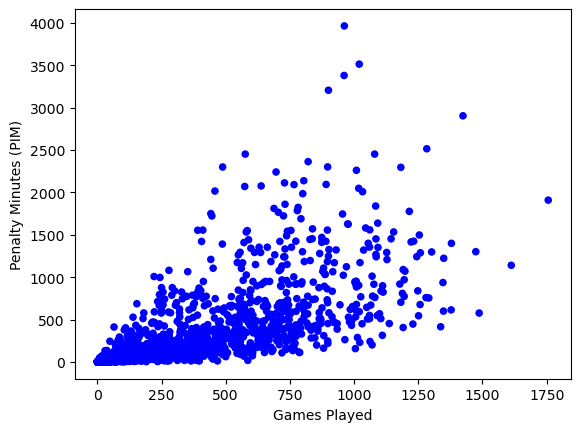

In [162]:
thinkplot.Scatter(gp, pim, alpha=1)
thinkplot.Config(xlabel='Games Played',
                 ylabel='Penalty Minutes (PIM)',
                 legend=False)

#### Corvariance

In [164]:
gp, pim = dfCareer.GP, dfCareer.PIM
Cov(gp, pim)

97180.31595415226

#### Pearson's Correlation

In [167]:
Corr(gp, pim)

0.7340897272857095

#### Spearman's Correlation

In [170]:
SpearmanCorr(gp, pim)

0.9091494562529586

This relationship is even strogner than my other scatterplot. Not what I expected here, but it seems to be worth looking more at.

# Hypothesis Test

Null Hypothesis: There is no difference, with respect to goals scored, between Canadians and players of other nationalities.
Alternative Hypothesis: Canadians are better at scoring goals.

In [94]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [96]:
data= Canadian.G.values, Other.G.values
ht=DiffMeansPermute(data)
pvalue=ht.PValue()
pvalue

0.192

This tells me the results for the difference in means is not statistically significant. Basically that Canadians aren't scoring enough goals compared to players from other countries to officially say that Canadians are better players.

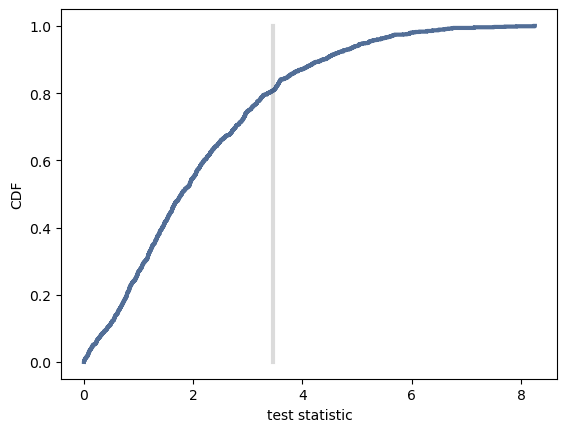

In [99]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [101]:
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [103]:
ht = DiffStdPermute(data)
pvalue = ht.PValue()
pvalue

0.688

After multiple hypothesis tests it appears that my null hypothesis stands true. There is no significant difference between Canadian players and players of other nationalities.

# Regression Analysis

## Ordinary Least Squares Regression

In [51]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)
    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [53]:
goal=dfCareer.G
gp=dfCareer.GP

In [55]:
inter, slope = LeastSquares(gp, goal)
inter, slope

(-12.742802716379614, 0.21627003447542628)

In [57]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [59]:
fit_xs, fit_ys = FitLine(gp, inter, slope)

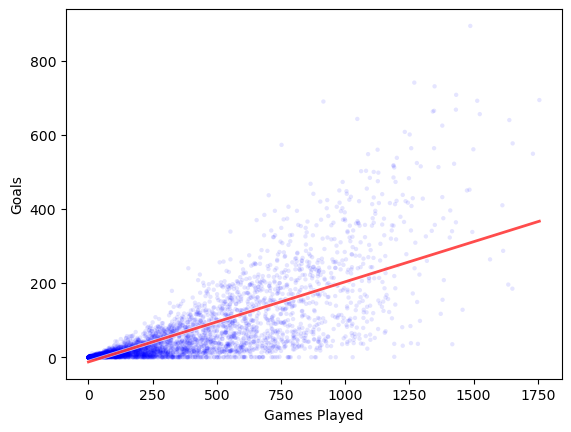

In [61]:
thinkplot.Scatter(gp, goal, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Games Played",
                 ylabel='Goals',
                 legend=False)

### Residuals

In [64]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [66]:
dfCareer['residual'] = Residuals(gp, goal, inter, slope)

In [68]:
bins = np.arange(10, 48, 3)
indices = np.digitize(dfCareer.GP, bins)
groups = dfCareer.groupby(indices)

gp_means = [group.GP.mean() for _, group in groups][1:-1]
gp_means

[10.984126984126984,
 14.05084745762712,
 17.032258064516128,
 19.98701298701299,
 22.666666666666668,
 26.0531914893617,
 29.06153846153846,
 32.03508771929825,
 34.875,
 37.953125,
 40.95744680851064,
 43.75]

In [70]:
cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups][1:-1]

In [72]:
def PlotPercentiles(gp_means, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(gp_means, weight_percentiles, label=label)

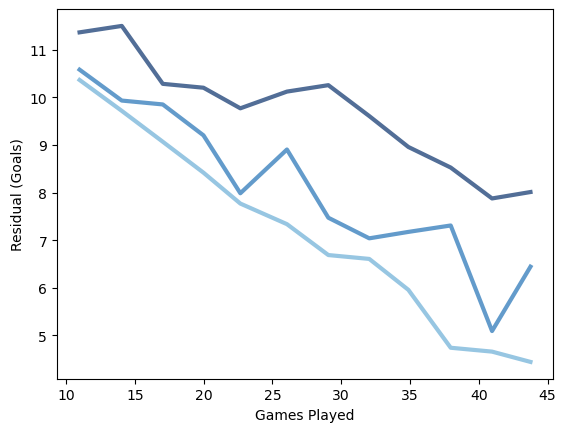

In [74]:
PlotPercentiles(gp_means, cdfs)

thinkplot.Config(xlabel="Games Played",
                 ylabel='Residual (Goals)')